(9652, 6)


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should pr


epoch:0 train_loss:0.10824145069772588 val_loss:0.029136790174044594
save best_model now_val_best_loss is:0.029136790174044594



epoch:1 train_loss:0.02095996115131129 val_loss:0.01443347501915742
save best_model now_val_best_loss is:0.01443347501915742



epoch:2 train_loss:0.02017955960090681 val_loss:0.010527803639009285
save best_model now_val_best_loss is:0.010527803639009285



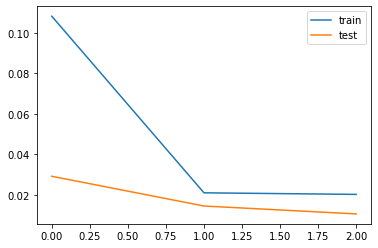

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [11]:
import requests
import gc
gc.collect()
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_開狀人.csv',index_col=0)
print(df.shape)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/0ac62d4a6efe4b7f9cc58ff8ff614aca7603fa25/bert_train_pipeline.py'
exec(requests.get(url).text)
qustion = 'What is the Applicant name?'
model_path = '../models/Product_Data_SQuAD_model_開狀人.pt'
res,table = bert_train_pipeline(train_df,val_df,qustion,model_path,start_idx_from_0=True)

In [12]:
res

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.984066,0.946142,0.968928,0.998446,1.0


In [13]:
table.sample(10)

,Y_label,predict,是否全對
8249,XIAMEN GOLDEN CHEMICALS COLTD,XIAMEN GOLDEN CHEMICALS COLTD,Yes
10258,MEIWA CORPORATION,MEIWA CORPORATION,Yes
10561,CBC TRADING CORPORATION,CBC TRADING CORPORATION,Yes
10267,FORMERANK LIMITED,FORMERANK LIMITED,Yes
3759,PLASRICH INTERNATIONAL GROUP LTD,PLASRICH INTERNATIONAL GROUP LTD,Yes
7394,MY EAST SDN BHD,MY EAST SDN BHD,Yes
11339,PEKON ELECTRONICS LTD,PEKON ELECTRONICS LTD,Yes
12366,XIAMEN GOLDEN CHEMICALS CO LTD,XIAMEN GOLDEN CHEMICALS CO,No
8784,LEO CHEMO PLAST PRIVATE LIMITED,LEO CHEMO PLAST PRIVATE LIMITED,Yes
985,MONTEX GLASS FIBRE INDUSTRIES,MONTEX GLASS FIBRE INDUSTRIES,Yes
